In [1]:
import pandas as pd

temp = pd.read_csv("Dehli_temp.csv", index_col="Date")

temp


,_id,Rain,Temp Max,Temp Min
Date,,,,
1951-01-01T00:00:00,1,0.0,20.139999,3.680000
1951-01-02T00:00:00,2,0.0,21.680000,3.600000
1951-01-03T00:00:00,3,0.0,21.280001,3.510000
1951-01-04T00:00:00,4,0.0,21.610001,4.090000
1951-01-05T00:00:00,5,0.0,21.389999,5.100000
...,...,...,...,...
2020-12-27T00:00:00,25564,0.0,22.051994,6.328302
2020-12-28T00:00:00,25565,0.0,18.723864,5.856754
2020-12-29T00:00:00,25566,0.0,17.541933,3.587756


In [2]:
temp.apply(pd.isnull).sum()/temp.shape[0]

_id         0.000000
Rain        0.000000
Temp Max    0.000000
Temp Min    0.000039
dtype: float64

In [3]:
core_temp = temp[["Rain", "Temp Max", "Temp Min"]].copy()
core_temp.columns = ["RAIN", "TMAX", "TMIN"]

core_temp

,RAIN,TMAX,TMIN
Date,,,
1951-01-01T00:00:00,0.0,20.139999,3.680000
1951-01-02T00:00:00,0.0,21.680000,3.600000
1951-01-03T00:00:00,0.0,21.280001,3.510000
1951-01-04T00:00:00,0.0,21.610001,4.090000
1951-01-05T00:00:00,0.0,21.389999,5.100000
...,...,...,...
2020-12-27T00:00:00,0.0,22.051994,6.328302
2020-12-28T00:00:00,0.0,18.723864,5.856754
2020-12-29T00:00:00,0.0,17.541933,3.587756


In [4]:
core_temp.apply(pd.isnull).sum()

RAIN    0
TMAX    0
TMIN    1
dtype: int64

In [5]:
core_temp = core_temp.fillna(method="ffill")

core_temp.apply(pd.isnull).sum()

RAIN    0
TMAX    0
TMIN    0
dtype: int64

Here we make sure the data set is apt for being trained, which means that there are no NULL values.

In [6]:
core_temp.index

Index(['1951-01-01T00:00:00', '1951-01-02T00:00:00', '1951-01-03T00:00:00',
       '1951-01-04T00:00:00', '1951-01-05T00:00:00', '1951-01-06T00:00:00',
       '1951-01-07T00:00:00', '1951-01-08T00:00:00', '1951-01-09T00:00:00',
       '1951-01-10T00:00:00',
       ...
       '2020-12-22T00:00:00', '2020-12-23T00:00:00', '2020-12-24T00:00:00',
       '2020-12-25T00:00:00', '2020-12-26T00:00:00', '2020-12-27T00:00:00',
       '2020-12-28T00:00:00', '2020-12-29T00:00:00', '2020-12-30T00:00:00',
       '2020-12-31T00:00:00'],
      dtype='object', name='Date', length=25568)

In [7]:
core_temp.index = pd.to_datetime(core_temp.index)

core_temp.index

DatetimeIndex(['1951-01-01', '1951-01-02', '1951-01-03', '1951-01-04',
               '1951-01-05', '1951-01-06', '1951-01-07', '1951-01-08',
               '1951-01-09', '1951-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=25568, freq=None)

<Axes: xlabel='Date'>

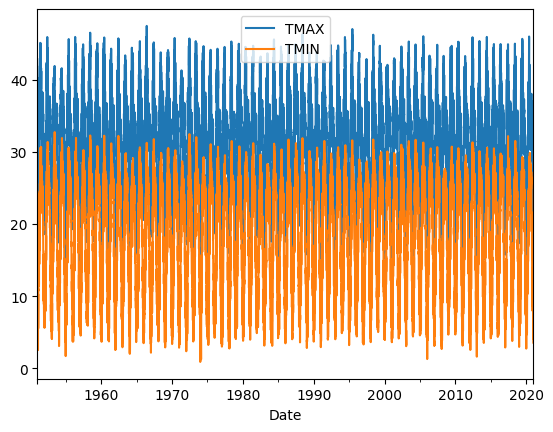

In [8]:
core_temp[["TMAX","TMIN"]].plot()

In [9]:
core_temp["target"] = core_temp.shift(-1)["TMAX"]
core_temp

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933
2020-12-29,0.0,17.541933,3.587756,16.661449


SHIFT shifts all the rows above by 1 above. Now we can see the last row has NaN value, so we need to remove that row, instead of forward filling. This is because otherwise, it would become an outlier and deteriorate the accuracy of the model.

In [10]:
core_temp = core_temp.iloc[:-1,:].copy()
core_temp

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933


In [11]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [12]:
predictors = ["RAIN", "TMAX", "TMIN"]

In [13]:
train = core_temp.loc[:"2018-12-31"]
test = core_temp.loc["2019-01-01":]

train

,RAIN,TMAX,TMIN,target
Date,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000
1951-01-02,0.0,21.680000,3.600000,21.280001
1951-01-03,0.0,21.280001,3.510000,21.610001
1951-01-04,0.0,21.610001,4.090000,21.389999
1951-01-05,0.0,21.389999,5.100000,20.990000
...,...,...,...,...
2018-12-27,0.0,19.970043,3.602986,19.593437
2018-12-28,0.0,19.593437,3.938406,20.579113
2018-12-29,0.0,20.579113,2.979738,22.540030


In [14]:
test

,RAIN,TMAX,TMIN,target
Date,,,,
2019-01-01,0.0,21.825138,4.863581,22.728121
2019-01-02,0.0,22.728121,7.174148,20.498020
2019-01-03,0.0,20.498020,5.824960,18.239582
2019-01-04,0.0,18.239582,6.052870,20.296579
2019-01-05,0.0,20.296579,7.234273,17.874247
...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994
2020-12-27,0.0,22.051994,6.328302,18.723864
2020-12-28,0.0,18.723864,5.856754,17.541933


In [15]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [16]:
predictions = reg.predict(test[predictors])

In [17]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARED ERROR IS = ")
mean_squared_error(test["target"], predictions)

MEAN SQUARED ERROR IS = 


2.56222346741013

In [18]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["ACT", "PRED"]
combined

,ACT,PRED
Date,,
2019-01-01,22.728121,21.941720
2019-01-02,20.498020,22.873271
2019-01-03,18.239582,20.723301
2019-01-04,20.296579,18.601145
2019-01-05,17.874247,20.582051
...,...,...
2020-12-26,22.051994,22.124965
2020-12-27,18.723864,22.206333
2020-12-28,17.541933,19.051111


<Axes: xlabel='Date'>

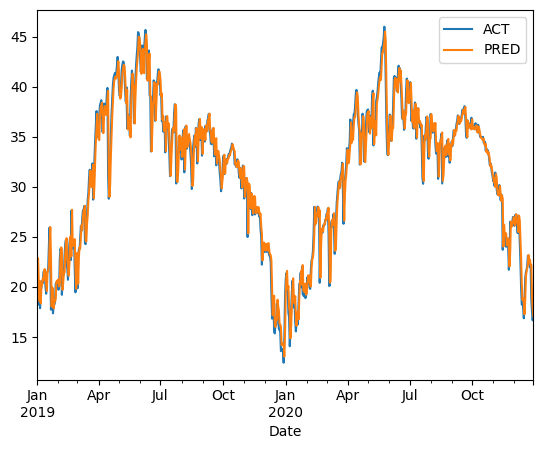

In [19]:
combined.plot()

In [20]:
reg.coef_

array([-0.00970625,  0.94314623,  0.03458308])

In [21]:
core_temp["month-max"] = core_temp["TMAX"].rolling(30).mean()

Here we do rolling mean of previous 30 values. Now, the first 30 data rows will have NaN value in month-max as there are no 30 values previously.

In [22]:
core_temp

,RAIN,TMAX,TMIN,target,month-max
Date,,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000,NaN
1951-01-02,0.0,21.680000,3.600000,21.280001,NaN
1951-01-03,0.0,21.280001,3.510000,21.610001,NaN
1951-01-04,0.0,21.610001,4.090000,21.389999,NaN
1951-01-05,0.0,21.389999,5.100000,20.990000,NaN
...,...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994,23.476155
2020-12-27,0.0,22.051994,6.328302,18.723864,23.327490
2020-12-28,0.0,18.723864,5.856754,17.541933,23.086355


In [23]:
core_temp["month_day_max"] = core_temp["month-max"] / core_temp["TMAX"]

core_temp["max_min"] = core_temp["TMAX"] / core_temp["TMIN"]

core_temp

,RAIN,TMAX,TMIN,target,month-max,month_day_max,max_min
Date,,,,,,,
1951-01-01,0.0,20.139999,3.680000,21.680000,NaN,NaN,5.472826
1951-01-02,0.0,21.680000,3.600000,21.280001,NaN,NaN,6.022222
1951-01-03,0.0,21.280001,3.510000,21.610001,NaN,NaN,6.062678
1951-01-04,0.0,21.610001,4.090000,21.389999,NaN,NaN,5.283619
1951-01-05,0.0,21.389999,5.100000,20.990000,NaN,NaN,4.194118
...,...,...,...,...,...,...,...
2020-12-26,0.0,21.985580,5.786714,22.051994,23.476155,1.067798,3.799320
2020-12-27,0.0,22.051994,6.328302,18.723864,23.327490,1.057840,3.484662
2020-12-28,0.0,18.723864,5.856754,17.541933,23.086355,1.232991,3.196970


In [24]:
core_temp = core_temp.iloc[30:,:].copy()

core_temp

,RAIN,TMAX,TMIN,target,month-max,month_day_max,max_min
Date,,,,,,,
1951-01-31,2.26217,23.639999,7.620000,22.690001,20.867667,0.882727,3.102362
1951-02-01,0.00000,22.690001,7.680000,22.129999,20.901333,0.921169,2.954427
1951-02-02,0.00000,22.129999,6.150000,17.320000,20.929667,0.945760,3.598374
1951-02-03,0.00000,17.320000,2.540000,19.540001,20.786667,1.200154,6.818898
1951-02-04,0.00000,19.540001,4.980000,19.840000,20.725000,1.060645,3.923695
...,...,...,...,...,...,...,...
2020-12-26,0.00000,21.985580,5.786714,22.051994,23.476155,1.067798,3.799320
2020-12-27,0.00000,22.051994,6.328302,18.723864,23.327490,1.057840,3.484662
2020-12-28,0.00000,18.723864,5.856754,17.541933,23.086355,1.232991,3.196970


In [25]:
def create_predictions(predictors, core_temp, reg):
    train = core_temp.loc[:"2018-12-31"]
    test = core_temp.loc["2019-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["ACT", "PRED"]
    return error, combined

In [26]:
predictors = ["RAIN", "TMAX", "TMIN", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_temp, reg)
error

2.5420709053511312

As we can see that increasing the number of parameters reduces the error in our readings. This is the reason, we perform feature engineering to increase the features and accuracy of our readings

<Axes: xlabel='Date'>

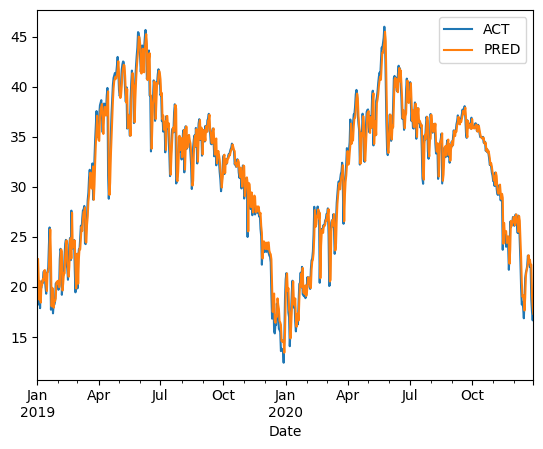

In [27]:
combined.plot()

In [28]:
reg.coef_

array([-0.01037681,  0.9648434 ,  0.01828744,  1.19119613, -0.02290094])

In [29]:
combined

,ACT,PRED
Date,,
2019-01-01,22.728121,21.906659
2019-01-02,20.498020,22.796625
2019-01-03,18.239582,20.729545
2019-01-04,20.296579,18.710492
2019-01-05,17.874247,20.568269
...,...,...
2020-12-26,22.051994,22.148398
2020-12-27,18.723864,22.217726
2020-12-28,17.541933,19.213205
